가설 검증을 통한 데이터 분석 기초

데이터 분석은 가설 검정의 연속이다. 굳이 분석 속도를 늦추며 가설 검정을 하는 이유는 데이터를 바라볼 때 가능한 주관과 직감을 배제하기 위함이며 분석의 방향을 잃지 않도록 단계별로 구체적인 '목적'을 가지기 위함이다. <br><br>
가설 검정을 통해 데이터를 분석하는 습관을 기르면 처음에는 속도가 더딜지라도 **결국 정확하고 객관적이며 빠른 속도로 결론에 도달할 수 있다.**<br><br>
따라서 본문을 통해 작은 고민도 가설을 세우고 객관적으로 풀어가는 연습을 하고자 한다.

In [93]:
import FinanceDataReader as fdr

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use(['classic']) # 테마: 주식 차트 느낌내기

import warnings
warnings.filterwarnings(action='ignore')

In [81]:
stock_kakao = fdr.DataReader('035720')
stock_kakao

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-11-11,999,999,999,999,12,NaN
1999-11-12,1115,1115,1115,1115,140,0.116116
1999-11-15,1249,1249,1249,1249,405,0.120179
1999-11-16,1396,1396,1396,1396,214,0.117694
1999-11-17,1561,1561,1561,1561,191,0.118195
...,...,...,...,...,...,...
2021-08-31,152500,155000,151000,155000,3078357,0.023102
2021-09-01,155000,156000,154000,154000,2011434,-0.006452
2021-09-02,154500,156000,153500,155000,1649156,0.006494


카카오 주식을 1999년 11월 11일에 100만원 치 샀다면 오늘 얼마일까?

일반적인 수준에서 "100배 올랐다" 하면 주식으로 정말 많이 벌었다고 할 수 있다. 
- 귀무가설) 카카오 주가는 100배 혹은 그 미만으로 올랐다
- 연구가설) 카카오 주가는 100배를 초과하여 올랐다


In [82]:
# 오타 방지를 위해 컬럼명 소문자로 변경
stock_kakao.columns = stock_kakao.columns.str.lower()
stock_kakao.columns

Index(['open', 'high', 'low', 'close', 'volume', 'change'], dtype='object')

In [83]:
# 수익 계산을 위해 첫날 주가로 전체 종가 나누기 
stock_kakao['yield'] = stock_kakao['close']/stock_kakao['close'][0]

# 첫날 매입한 카카오 주식의 총 가격을 100만원으로 환산
stock_kakao['yield'] *= 1000000

# 소수점 이하 제거
stock_kakao['yield'] = stock_kakao['yield'].astype('int64')
stock_kakao['yield']

# 보기 쉽게 '천' 단위 구분자 포함된 문자열로 변환
# ## ex) 1.000000e+06 --> "1,000,000.0"
stock_kakao['yield'] = stock_kakao['yield'].apply(lambda x : '{:,}'.format(x))
stock_kakao['yield']

Date
1999-11-11      1,000,000
1999-11-12      1,116,116
1999-11-15      1,250,250
1999-11-16      1,397,397
1999-11-17      1,562,562
                 ...     
2021-08-31    155,155,155
2021-09-01    154,154,154
2021-09-02    155,155,155
2021-09-03    156,656,656
2021-09-06    155,655,655
Name: yield, Length: 5388, dtype: object

새 천년이 시작하기 직전에 카카오 주식을 100만원치만 사놓고 잊고 지냈다면 지금쯤 1억 5천만원을 벌었다. **150배 넘개 올랐기 때문에 귀무가설을 기각한다.**

그렇다면 카카오 주가는 항상 시뻘갰을까?

- 귀무가설) 카카오 주가는 항상 상승세였다.
- 연구가설) 카카오 주가는 항상 상승세가 아니었다.(등락이 있었다.)

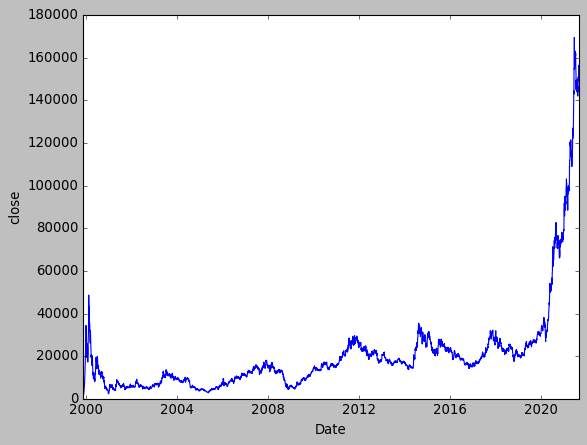

In [90]:
sns.lineplot(x=stock_kakao.index, y=stock_kakao['close']);

2020년까지는 

In [61]:
stock_kakao.index.day

Int64Index([11, 12, 15, 16, 17, 18, 19, 22, 23, 24,
            ...
            24, 25, 26, 27, 30, 31,  1,  2,  3,  6],
           dtype='int64', name='Date', length=5388)